## NYC Taxi Trip Duration EDA

NYC Taxi Trips details data is provided & we are asked to predict Trip duration . This will help them to manage their fleets better . In this notebook , we will perform EDA . 

Here is the description of all the variables / features available in the dataset .

## Data Dictionary 
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - (target) duration of the trip in seconds

## Loading Packages for EDA

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/NYC Trip Duration Data/nyc_taxi_trip_duration.csv")

In [4]:
  df.shape, df.columns

((729322, 11), Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
        'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'trip_duration'],
       dtype='object'))

We have data of 729322 records with 11 columns . We have 10 features and 1 target i.e. trip_duration . Let's look at value of all columns for 1 record.

In [5]:
  df.iloc[1,]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

We have a mix of numeric , datetime, categorical variables . Lets see if there are any missing values .

In [6]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no missing values . 

## Target exploration

In [7]:
df['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

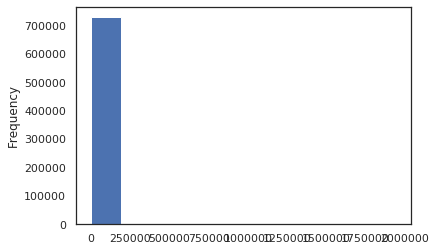

In [8]:
df['trip_duration'].plot.hist()

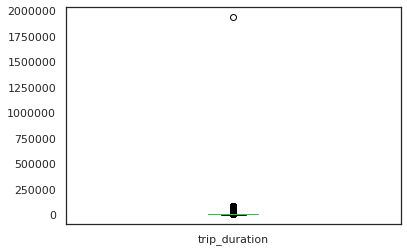

In [9]:
df['trip_duration'].plot.box()

 Lets plot histogram by taking log of trip duration.

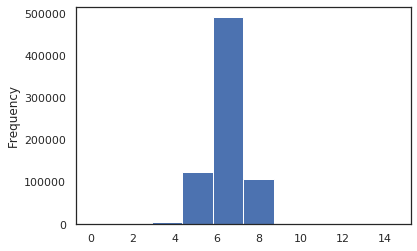

In [10]:
np.log(df['trip_duration']).plot.hist()

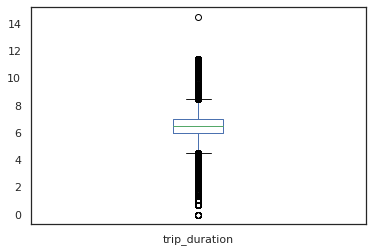

In [11]:
np.log(df['trip_duration']).plot.box()

## Univariate analysis

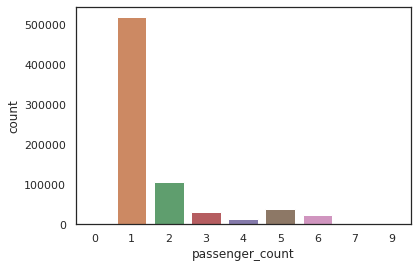

In [17]:
sns.countplot(df['passenger_count'])

Most of the rides involve only 1 passenger . 

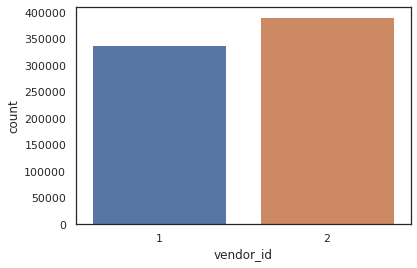

In [19]:
sns.countplot(df['vendor_id'])

There is not much difference in number of rides for vendor 1 , 2 but vendor 2 has more rides.

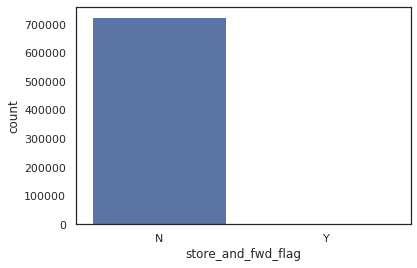

In [20]:
sns.countplot(df['store_and_fwd_flag'])

In [21]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

There are only few records with store and fwd flag 1.

## Date features

In [0]:
#Lets derive date features & plot visuals .

import datetime as dt

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)


df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour


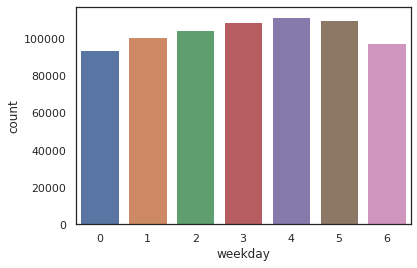

In [25]:
# weekday

sns.countplot(df['weekday'])

Observation : number of pick ups on weekends are much less than weekdays.

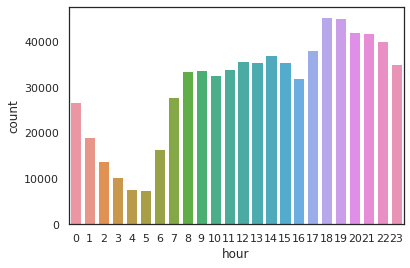

In [26]:

sns.countplot(df['hour'])

Observation : Number of pickups is high in evening which may be related to office timings while midnight to early morning is least.

## Correlation Heatmap

We will look at correlation map to check what all variables are correlated and to what extent.

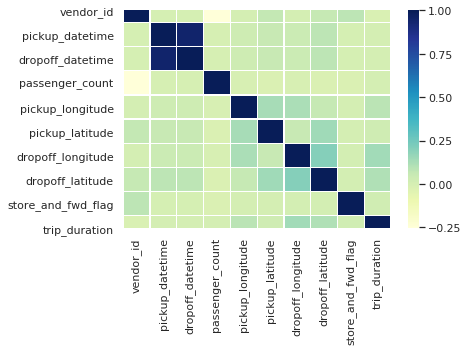

In [15]:
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
#corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

observations: Latitude , longitide fields have most correlation with target variable.
